# Part II - Report on bike-sharing system in SF Bay area for February, 2019
## by Abdulafiz Musa


## Investigation Overview


> My main focus for investigation this data set where the categories of users of this bike-sharing system; gender, user types, birth year and their duration of rides.


## Dataset Overview

> This data set includes information about a bike-sharing system in greater San Francisco Bay area. It includes daily individual rides that occurred in the month of February, 2019. There are 183412 enteries for this individual bike rides during this period.

> Some of the data were converted to log scale in order to observe all points of data. Some null values had to be dropped before observing as some graphs do not function with them around, otherwise all enteries were properly represented.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bss = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of rides according to duration spent (secs)

> Rides usually last fewer than ten thousands sec. suggesting it isn't for really long distances. Plotting a log scale of the data depicts the entire data properly.

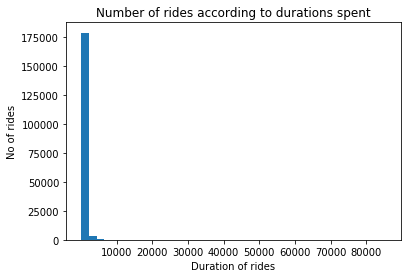

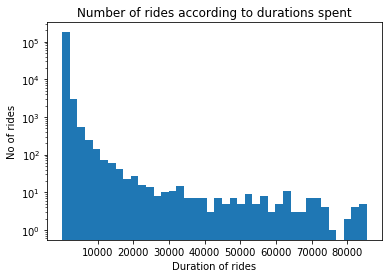

In [3]:
def plotFunc(plt):
    plt.xticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
    plt.title('Number of rides according to durations spent')
    plt.xlabel('Duration of rides')
    plt.ylabel('No of rides')
    plt.show()
    
# histogram showing duration distribution
plt.hist(data = bss, x = 'duration_sec', bins = 40)
plotFunc(plt)
#log scaling
plt.hist(data = bss, x = 'duration_sec', bins = 40,  log = True)
plotFunc(plt)

## Distribution of users according to age

> The users are prominently working class (around 1990). We've got a number of old people too as seen in the log scale.

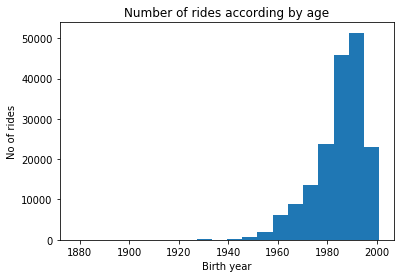

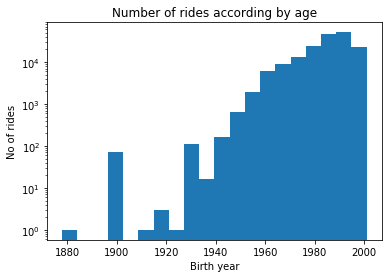

In [4]:
#drop nul values and birth year should be an integer
bss.member_birth_year.dropna(inplace = True)

def plotFunc(plt):
    plt.title('Number of rides according by age')
    plt.xlabel('Birth year')
    plt.ylabel('No of rides')
    plt.show()

# histogram showing distribution of birth years
plt.hist(data = bss, x = 'member_birth_year', bins = 20)
plotFunc(plt)

#log scaling
plt.hist(data = bss, x = 'member_birth_year', bins = 20, log = True)
plotFunc(plt)

## Relationship between ride duration and birth years

> Interestingly, there was no correlation between the distance traveled and the age of the users of the bike system. Even after considering log scaling.

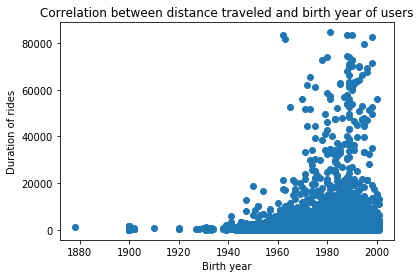

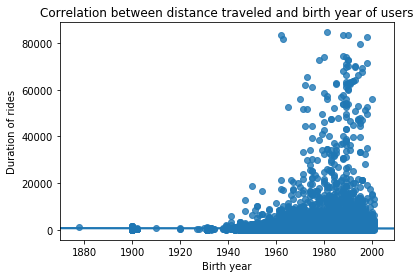

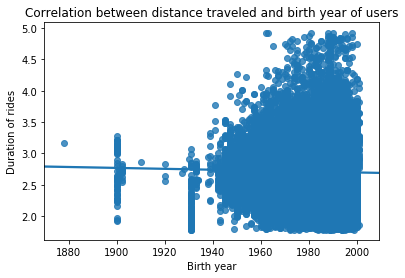

In [5]:
bss.dropna(inplace = True)
def plotFunc(plt):
    plt.title('Correlation between distance traveled and birth year of users')
    plt.xlabel('Birth year')
    plt.ylabel('Duration of rides')
    plt.show()

#scatterplot showing correlation between ride duration and birth years
plt.scatter(data = bss, x = 'member_birth_year', y = 'duration_sec')
plotFunc(plt)

# regplot to show correlation
sb.regplot(data = bss, x = 'member_birth_year', y = 'duration_sec')
plotFunc(plt)

#regplot with log scaling
def log(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(bss.member_birth_year, bss.duration_sec.apply(log))
plotFunc(plt)

## Relationship between user types and bike sharing

> It has been show that majority of the users are subscribers; it's fun to have observed that either the customers didnt share their bikes on journeys or they just cant and only subscribers are able to do so.

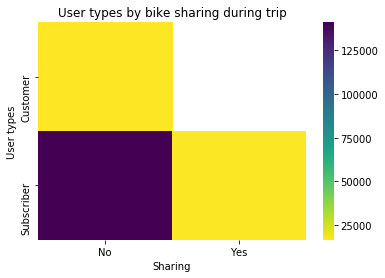

In [6]:
users = bss.groupby(['user_type', 'bike_share_for_all_trip']).size()
users = users.reset_index(name='count')
users = users.pivot(index = 'user_type', columns = 'bike_share_for_all_trip', values = 'count')
sb.heatmap(users, cmap = 'viridis_r')
plt.title('User types by bike sharing during trip')
plt.xlabel('Sharing')
plt.ylabel('User types')
plt.show()

## Predicting duration between take offs and destinations 

> Depending on our ability to discern the take off and destination IDs, we can tell how long it wil take us to travel from one area to another; this could be dependent on how busy some areas are too.

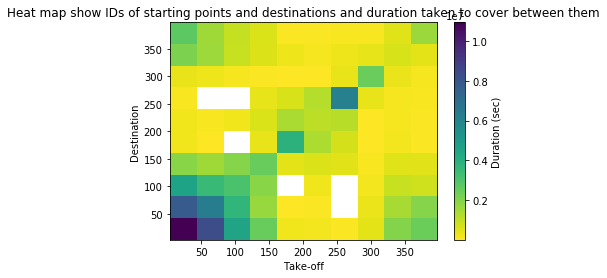

In [7]:
# predicting duration of travel
plt.hist2d(data = bss, x = 'start_station_id', y = 'end_station_id', weights = 'duration_sec', cmap = 'viridis_r', cmin = 0.5);
plt.title('Heat map show IDs of starting points and destinations and duration taken to cover between them')
plt.xlabel('Take-off')
plt.ylabel('Destination');
plt.colorbar(label = 'Duration (sec)')
plt.show()

### Conclusion
 
The dataset provided for the bike sharing system is very much reliable. Very few columns have missing data and their are no incorrect entries. 
In summary, 
> Majority of the users are male. The users are prominently working class (1990s), we've got a number of old people too. Very few users share their bikes during each journey which are usually fewer ten thousands sec. suggesting it isn't for really long distances.

> There's an established majority of males using this system, however the variation between the subscribers and customers looked constant accross other categories. There is also a near equal distribution for the age groups too; they are majorly 1990s across the gender groups. Interestingly, there was no correlation between the distance traveled and the age of the users of the bike system. It has been show that majority of the users are subscribers; it's fun to have observed that either the customers didnt share their bikes on journeys or they just cant and only subscribers are able to do so.

> It's clearer that customers did not have the capacity to share their bikes. Depending on our ability to discern the take off and destination IDs, we can tell how long it wil take us to travel from one area to another; this could be dependent on how busy some areas are too.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 447980 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
